# Junior software engineer technical interview
> **NOTE** There is no *single right answer* for these tasks.
> For example, there might only be optimizations with negligible speed-ups to be made to the sample codes.
> Primarily, we want to see how you approach them and will use your answers to kick off a discussion.
> The problems are formulated such that deep knowledge of the problem domain is not needed.

> **NOTE** We use Copilot to automate some of our day-to-day coding tasks.
> Please, let us know if you used Copilot or any similar tool when working through this notebook.

## Best practices for collaborative code development

We are in the process of setting up a repository for our platform for chemistry
simulations for drug design and discovery.

The platform will be initially for internal use, but we plan to release at least
parts of it as open source. Many of the current developers are scientists
without a strong development background. The workflow should be lean but take
into account a lot of code review to remove spaghetti code, add tests,
documentation _etc._

Knowing all this, how would you proceed with designing the development and
maintenance workflow, including:

* git workflow
* versioning scheme
* release cycle
* Tests/linting/formatting (and CI in general)
* pull request policies, review _etc._

## <span style='color:blue'> Answer </span>

**git workflow**
* To do practice over this part I've made this repository https://github.com/mehrankhosrojerdi/Quantum_Drug_discovery.git. 
* In the first stage I've tried to make some branches to do push changes over them and then I've merged them with the main branch and finally to have a clean repository I've deleted then.

**versioning scheme**
* In this part we mainly use github tag for release tracking
* For this part I've started to make tgas and push them to the github for released and beta version

**release cycle**
* This cycle consist of doing some update over code in rder to fix bugs or add a new feature
* it consist of first stage, pre-released, stable release, patch release and final version

**Tests/linting/formatting (and CI in general)**
* Using continuous integration (CI) we are trying detect issues early and ensure that the new code integrates well.
* Using CI we want to ensure that the new change doesn’t break the code and it works correctly with the rest of the project.
* For specific project we should make a workflow directory in local repository and make a .yml file. While we have an opportunity to use the template that are ready to use in github/action for python files.
* Using .yml file we have this opportunity to either test each units of the code or testing the entire of the result.

**pull request policies, review _etc._**
* In pull request we clearly describe changes 
* In PR team members ensure that the code looks good
* Main code remain clean

## Design and implementation of an `Ansatz` class

The state of a quantum system is represented as a circuit on a quantum computer.
For a system with $N$ qubits, the circuit will consist of a certain number of
_gates_ arranged in $M$ _layers_.

<img src="https://user-images.githubusercontent.com/3708689/255829669-b989d9a7-714f-49d2-b59f-03829568ec30.png" width=300 height=300/>

The sample circuit in the figure shows:

* The qubits, circled in blue.
* A gate, circled in magenta.
* A layer, circled in green.

Quantum software development kits (SDKs), such as Qiskit, already provide
classes to describe the quantum circuit.
However, we need a further abstraction layer to represent the Ansatz for the
system.
Having a flexible abstract representation of the state is beneficial for, among
others, these reasons:

* Optimized circuits are difficult to interpret, so having both concrete (as circuit) and abstract (as Ansatz) representations can be beneficial for algorithmic analysis, physical and chemical insight.
* Transpiling from the state representation to the circuit implemented on hardware can be aggressively optimized. Both the efficiency of transpilation and the efficiency of the resulting circuits can make or break a variational quantum algorithm.

After discussions with the team, there's agreement that you should design, implement, and unit-test an `Ansatz` class that:

* Respects these constraints:

    1. Each layer can have multiple gates.
    2. No gates can overlap in a layer.
    3. Only 1- and 2-qubit gates are allowed. That is, in the figure above any gate can "touch" at most two qubits.

* Achieves these functional requirements:

    1. Fast access to the first available layer.
    2. Fast iteration qubit-by-qubit.
    3. Fast iteration layer-by-layer.

A gate is a wrapper type for a unitary matrix of dimension $2^q \times 2^q$, where $q$ is the number of active qubits for the gate, either 1 or 2, given the constraint above.

You can assume it's implemented as:

In [1]:
from dataclasses import dataclass

import numpy as np


@dataclass
class Gate:
    qubits: list[int]
    """List of active qubits for the gate."""
    unitary: np.ndarray
    """Gate unitary."""

1. What is your strategy to hash out the design for this class?
2. How would you actually implement your design? Please show relevant code snippets.
3. How would you test that your implementations meets the constraints and functional requirements? Please show relevant code snippets.
4. Explain how you would gather further feedback from the team and ask for clarifications on the specifications.

puls diagram


## <span style='color:blue'> Answer </span>

**1. What is your strategy to hash out the design for this class?**

Well, Ansatz referes to the quantum machine learning process and mainly it is about the variational quantum circuits. To deal with this problem I would like to start with the main three blocks that we have in a quantum device. First block is **encoding block** which we encod classical data to the quantum states. The second block is **Quantum model** which can either be *deterministic* or *variationl*. In this case we are dealing with **variational quantum model**. And the last block is our measurment block that the output tells us how much we are close to the true anwere.

As a simple example I would say that we can start with a bunch of qubits in random states and then apply various type of trainable-gates over them and following that we have measurment like the expection value of an operator. Then by comparison the measurment result by the true value and calculation the cost function we understand how we should train the gates in order to reach the zero value for cost function.

In this problem we just need to design an **Ansatz class** with specific constraints and requirements. 
* we need a class to represnt the states of qunatum system which involve multiple layers, where each layer contain a list of gates.
* we have a constrain about layer which each layer can contain multiple gates, but there should be no overlap between gates in a layer. Only 1- and 2-qubit gates are allowed
* we shoud achieves functional requirements like: fast access to the first available layer, fast iteration qubit-by-qubit, and fast iteration layer-by-layer.

**2. How would you actually implement your design? Please show relevant code snippets.**

To start, lets deal with this problem just by considering the constrain that we have:
1. Each layer can have multiple gates.
2. No gates can overlap in a layer.
3. Only 1- and 2-qubit gates are allowed. That is, in the figure above any gate can "touch" at most two qubits.

Intersting point here is about this constrains that all about the layers. Then in this step we have a specific outline for making the layers class.

In [159]:
from dataclasses import dataclass
import numpy as np

@dataclass
class Gate:
    qubits: list[int]
    """List of active qubits for the gate (only one or two qubits)."""
    unitary: np.ndarray
    """Gate unitary."""

class Layer:

    def __init__(self):
        self.gates = [] 

    def add_gate(self, gate):
        if len(gate.qubits) not in [1,2]:
            raise ValueError('doesnt opperate over one or two active qubit')
        for exist_gate in self.gates:
            if set(gate.qubits) & set(exist_gate.qubits):
                raise ValueError('has overlap with others')
        self.gates.append(gate)
        return 'gate add successfully'


Now its the time to define **Ansatz class**. For making this part we should consider that at the end we must meet the functional requirements:

**Fast access to the first available layer.**

In this part, I would say that accessing to the first element of a list takes constant time in python. In this case regardless to the number of layers as we want to access to the first elemnt of list, we meet the target.

**Fast iteration layer-by-layer.**

A Practical way to iterate layer-by-layer is using the *yield* as instead of returning entire of a list at once, yield one at time. This is thefaset sturcure of  the code that we do iteration layer by layer and in each time we consider specific layer.

**Fast iteration qubit-by-qubit.**

Again using *yield* we will have iteration over qubits in an efficient way

In [198]:
from dataclasses import dataclass
import numpy as np

@dataclass
class Gate:
    qubits: list[int]
    """List of active qubits for the gate (only one or two qubits)."""
    unitary: np.ndarray
    """Gate unitary."""

class Ansatz_Layer:
    '''In this version of layers we will ignore the wrong gates.'''
    def __init__(self):
        self.gates = [] 

    def add_gate(self, gate):
        if len(gate.qubits) not in [1,2]:
            return  
        for exist_gate in self.gates:
            if set(gate.qubits) & set(exist_gate.qubits):
                return
        self.gates.append(gate)
    def __iter__(self):
        '''For fast iteration over layers and qubits'''
        return iter(self.gates)
    
class Ansatz:

    def __init__(self):
        self.layers = []
    
    def add_layer(self, layer):
        self.layers.append(layer)
    
    def get_layer(self):
        return self.layers
    
    def get_first_layer(self):
        if self.layers:
            return self.layers[0]
        else:
            return None
        
    def get_layer_iteration(self):
        '''return iter(self.layers)'''
        for layer in self.layers:
            yield layer
        
    def get_qubit_iteration(self):
        for layer in self.layers:
            for gate in layer:
                for qubit in gate.qubits:
                    yield qubit



**3. How would you test that your implementations meets the constraints and functional requirements? Please show relevant code snippets.** 

For test these classes I would like to do test over each classes in order to debuging. Let's begin by the **Layer class**.

In [160]:
layer = Layer()
def Layer_test(lst_gates):
    for i, gate in enumerate(lst_gates):
        try:
            layer.add_gate(gate)
        except ValueError as e:
            print(f'there is a problem: gate {i} {e}')

by defining a couple of gates we try to test the layer class

In [161]:
gate0 = Gate([0], np.identity(2))
gate1 = Gate([0,1,3], np.identity(8))
gate2 = Gate([1,2], np.identity(4))
gate3 = Gate([0,2], np.identity(4))

gates = [gate0, gate1, gate2, gate3]

Layer_test(gates)

there is a problem: gate 1 doesnt opperate over one or two active qubit
there is a problem: gate 3 has overlap with others


Here we can see that gate 1 and gate 3 have problems and we expect that they don-t append to the layer. Let's have a look

In [162]:
layer.gates

[Gate(qubits=[0], unitary=array([[1., 0.],
        [0., 1.]])),
 Gate(qubits=[1, 2], unitary=array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))]

Yeah, It is working.

Now let's do some test over the Ansatz class. Here we should bear in mind that the layer class is improved by some corrections.

In [200]:
gate0 = Gate([0], np.identity(2))
gate1 = Gate([0,1,2], np.identity(8))
gate2 = Gate([1,2], np.identity(4))
gate3 = Gate([0,2], np.identity(4))

layer1 = Ansatz_Layer()
layer2 = Ansatz_Layer()
layer3 = Ansatz_Layer()

layer1.add_gate(gate0)
layer1.add_gate(gate2)
layer2.add_gate(gate3) 
layer3.add_gate(gate1)

ansatz = Ansatz()
ansatz.add_layer(layer1) 
ansatz.add_layer(layer2)
ansatz.add_layer(layer3)

first_layer = ansatz.get_first_layer()

first_layer.gates

[Gate(qubits=[0], unitary=array([[1., 0.],
        [0., 1.]])),
 Gate(qubits=[1, 2], unitary=array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))]

Lets test the code when we have wrong gate

In [201]:
layers = ansatz.get_layer()
layers[2].gates

[]

yep. we have an empty list

Lets have a look on get_layer_iteration function that is iteration layar-by-layer

In [202]:
for i, layer in enumerate(ansatz.get_layer_iteration()):
    print(f"Layer {i+1}:")
    for gate in layer:
        print(f"  Gate acting on qubits {gate.qubits}")


Layer 1:
  Gate acting on qubits [0]
  Gate acting on qubits [1, 2]
Layer 2:
  Gate acting on qubits [0, 2]
Layer 3:


Lets have a look on get_qubit_iteration function that is iteration qubit-by-qubit

In [204]:
for qubit in ansatz.get_qubit_iteration():
    print(qubit)

0
1
2
0
2


Which is completly True! in first layer we start by qubit 0,1,2 and then in the second layer we have qubit 0 and 2.

## Tensor contractions

The following code performs the contraction:

$$
M_{pqrs} = \sum_{ABCD} S_{pA}T_{qB} U_{rC} V_{sD} I_{ABCD}
$$

In [30]:
import numpy as np


def contract_to_M(I: np.ndarray, S: np.ndarray, T: np.ndarray, U: np.ndarray, V:np.ndarray) -> np.ndarray:
    M = np.zeros((S.shape[0], T.shape[0], U.shape[0], V.shape[0]))

    for p in range(M.shape[0]):
        for q in range(M.shape[1]):
            for r in range(M.shape[2]):
                for s in range(M.shape[3]):
                    for A in range(I.shape[0]):
                        for B in range(I.shape[1]):
                            for C in range(I.shape[2]):
                                for D in range(I.shape[3]):
                                    M[p, q, r, s] += S[p, A] * T[q, B] * U[r, C] * V[s, D] * I[A, B, C, D]

    return M

1. What are the _Big-O_ estimates for the number of FLOPS and the amount of memory required?
2. How would you check that your estimates are in the right ballpark?
3. Rearrange the function such that the _Big-O_ estimate for the number of FLOPS is minimized. How are the _Big-O_ estimates for the memory affected?
4. Write tests to make sure the behaviour is consistent between the original and the rearranged versions of the code.

## <span style='color:blue'> Answer </span>

Well let's have a look on this problem using **quimb**. Suppose we have random tensors that one of them **I** has common index with others **S, T, U, and V**.

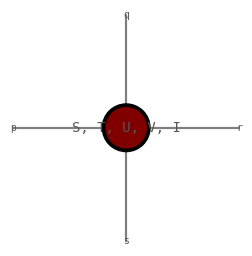

In [ ]:
import quimb as qu
import quimb.tensor as qtn 

I = qtn.rand_tensor(shape = [4,4,4,4], inds = ['A', 'B', 'C', 'D'], tags='I')
S = qtn.rand_tensor(shape = [3,4], inds = ['p','A'], tags='S')
T = qtn.rand_tensor(shape = [3,4], inds = ['q','B'], tags='T')
U = qtn.rand_tensor(shape = [3,4], inds = ['r','C'], tags='U')
V = qtn.rand_tensor(shape = [3,4], inds = ['s','D'], tags='V')

res = S@T@U@V@I
res.draw(node_color='maroon',
         node_outline_darkness=.1,
         figsize=(10,3),
         edge_color='black')

**1. What are the _Big-O_ estimates for the number of FLOPS and the amount of memory required?**

Well, to answer to this question, I would say we have some indexes that will contract with each others and we can call them as an inner indexes (A, B, C, D) and some outer indexes (p, q, r, s) that doesn't have any contractions. 

In the code that is provided by the host we can see $8$ nested loops which increase the computational cost by $O(N^8)$ where $N$ represents the dimensions of the each matrices.

For the memory requirement, I would say that RAM is the place to store inputs and outputs. Then we should calculate how much storage we need for input matrix and how much for the output. Here the point is about largest term among input matrixes that always dominant and take the major part of the memory and no need to consider low dimension tensors in the presence of large tensors. Consider this explanation the largest tensor among input tensors is $I_{ABCD}$ which its respective dimension is  $O(N^4)$ and the output matrix is $M_{pqrs}$ with respective dimension $O(M^4)$. This tells us that the memory usage is $I+M$

**2. How would you check that your estimates are in the right ballpark?**

Well mainly the structure of the code tells us how much it is efficient but for check the code we have some tools like *time* library for evaluation the runtime. 

Also for evaluating the memory usage we can use libraries like *tracemalloc* which is effectively monitor the memory usage. 

Moreover for the CPU usage in some cases we should use *psutil* library


**3. Rearrange the function such that the _Big-O_ estimate for the number of FLOPS is minimized. How are the _Big-O_ estimates for the memory affected?**

For this part I will rearrange the code in two ways. one of them using *np.tensordot* and another one using *np.einsum*. First lets make a class the funstions.

In [ ]:
import numpy as np

class tensor_contract():
    def __init__(self, I, S, T, U, V):
        self.I = I
        self.S = S
        self.T = T
        self.U = U
        self.V = V

    def contract_to_M(self):
        M = np.zeros((self.S.shape[0], self.T.shape[0], self.U.shape[0], self.V.shape[0]))

        for p in range(M.shape[0]):
            for q in range(M.shape[1]):
                for r in range(M.shape[2]):
                    for s in range(M.shape[3]):
                        for A in range(self.I.shape[0]):
                            for B in range(self.I.shape[1]):
                                for C in range(self.I.shape[2]):
                                    for D in range(self.I.shape[3]):
                                        M[p, q, r, s] += self.S[p, A] * self.T[q, B] * self.U[r, C] * self.V[s, D] * self.I[A, B, C, D]

        return M

    def contract_to_M_tensordot(self):
        M = np.tensordot(self.I, self.V, axes=(3, 1)) 
        M = np.tensordot(M, self.U, axes=(2, 1)) 
        M = np.tensordot(M, self.T, axes=(1, 1)) 
        M = np.tensordot(M, self.S, axes=(0, 1))  
        return M

    def contract_to_M_einsum(self):
        M = np.einsum('ABCD, pA, qB, rC, sD->pqrs', self.I, self.S, self.T, self.U, self.V)
        return M

Now we can have a look on the time evaluation for these three methods

In [58]:
I = np.random.rand(4, 4, 4, 4)
S = np.random.rand(3, 4)
T = np.random.rand(3, 4)
U = np.random.rand(3, 4)
V = np.random.rand(3, 4)

contractor = tensor_contract(I, S, T, U, V)

In [60]:
import time

start_h = time.time()
host = contractor.contract_to_M()
end_h = time.time()
print("host_code_runtime:", end_h - start_h)
start_d = time.time()
M_tdot = contractor.contract_to_M_tensordot()
end_d = time.time()
print("tensordot_runtime:", end_d - start_d)
start_e = time.time()
M_einsum = contractor.contract_to_M_einsum()
end_e = time.time()
print("einsum_runtime:", end_e - start_e)

host_code_runtime: 0.09019947052001953
tensordot_runtime: 0.0009753704071044922
einsum_runtime: 0.0006814002990722656


In [65]:
import tracemalloc

tracemalloc.start()
result = contractor.contract_to_M()
_, h_peak_memory = tracemalloc.get_traced_memory()
tracemalloc.stop() 
print("host_peak_memory_usage:", h_peak_memory)

tracemalloc.start()
result = contractor.contract_to_M_tensordot()
_, d_peak_memory = tracemalloc.get_traced_memory()
tracemalloc.stop() 
print("tensordot_peak_memory_usage:", d_peak_memory)

tracemalloc.start()
result = contractor.contract_to_M_einsum()
_, e_peak_memory = tracemalloc.get_traced_memory()
tracemalloc.stop() 
print("einsum_peak_memory_usage:", e_peak_memory)

host_peak_memory_usage: 21460
tensordot_peak_memory_usage: 19920
einsum_peak_memory_usage: 398160


**4. Write tests to make sure the behaviour is consistent between the original and the rearranged versions of the code.**

To become ensure about the original and rearranged version I would say that we can use *np.allclose* in a function that return us the boolean.

In [79]:
def test_contract(func_1, func_2):
    if np.allclose(func_1, func_2) == True:
        return 'successful'
    else:
        return 'unsuccessful'

I am considering the host approach as a true answer and I will compare the other codes with that

In [80]:
host = contractor.contract_to_M()
M_tdot = contractor.contract_to_M_tensordot()
M_einsum = contractor.contract_to_M_einsum()

print('the test result for the tensordot approach is', test_contract(host, M_tdot))
print('the test result for the einsum approach is', test_contract(host, M_einsum))


the test result for the tensordot approach is unsuccessful
the test result for the einsum approach is successful
